<a href="https://colab.research.google.com/github/Vayansh/Human-Activity-Recognition-using-Smartphones/blob/main/Human_activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
df.isna().sum().sum()

0

# **Spilting Data**

In [ ]:
df['Activity'].count()

7352

In [ ]:
Y_train = df['Activity']
X_train = df.drop('Activity',axis = 1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 562 entries, tBodyAcc-mean()-X to subject
dtypes: float64(561), int64(1)
memory usage: 31.5 MB


# **Label Encording**

In [ ]:
Y_train.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [ ]:
nclasses = 6

In [ ]:
from sklearn import preprocessing

In [ ]:
label = preprocessing.LabelEncoder()
label.fit(Y_train)
Y_train = label.transform(Y_train)

In [ ]:
Y_train

array([2, 2, 2, ..., 5, 5, 5])

# **Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler as sc

In [ ]:
scaler = sc()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
X_train

array([[ 0.20064157, -0.0636826 , -0.41962845, ...,  0.40794614,
        -0.00756789, -1.8288513 ],
       [ 0.05594788,  0.03148567, -0.25390836, ...,  0.40911698,
         0.00787517, -1.8288513 ],
       [ 0.07351535, -0.04341648, -0.07629468, ...,  0.4102883 ,
         0.02650234, -1.8288513 ],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ...,  0.64059683,
         0.34870928,  1.4025149 ],
       [ 0.21586648, -0.02812252, -0.86770988, ...,  0.63147758,
         0.29327564,  1.4025149 ],
       [ 1.09620157,  0.12919873, -1.67268082, ...,  0.63274259,
         0.33396081,  1.4025149 ]])

# **Modeling**

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras import Input

In [ ]:
model = Sequential()
model.add(Input(X_train.shape[1],))
model.add(Dense(256,activation = 'relu', kernel_initializer="glorot_uniform",))
model.add(Dense(64,activation = 'relu', kernel_initializer="glorot_uniform",))
model.add(Dense(32,activation = 'relu', kernel_initializer="glorot_uniform",))
model.add(Dense(128,activation = 'relu', kernel_initializer="glorot_uniform",))
model.add(Dense(32,activation = 'relu', kernel_initializer="glorot_uniform",))
model.add(Dense(6,activation = 'softmax', kernel_initializer="glorot_uniform",))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               144128    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 128)               4224      
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 6)                 198       
                                                                 
Total params: 171,206
Trainable params: 171,206
Non-tr

# **Training**

In [ ]:
Batch_Size = 32

In [ ]:
model.compile(optimizer='Adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint , ReduceLROnPlateau
history = model.fit(
    X_train, Y_train , batch_size= 32,epochs = 50,validation_split = 0.2,
    callbacks = [
        ModelCheckpoint('./model_2.h5',save_best_only = True),
    ]
)

Epoch 1/50
184/184 [==============================] - 2s 6ms/step - loss: 0.3053 - accuracy: 0.8801 - val_loss: 0.1917 - val_accuracy: 0.9273 - lr: 0.0010
Epoch 2/50
184/184 [==============================] - 1s 6ms/step - loss: 0.0960 - accuracy: 0.9624 - val_loss: 0.1802 - val_accuracy: 0.9368 - lr: 0.0010
Epoch 3/50
184/184 [==============================] - 1s 5ms/step - loss: 0.0821 - accuracy: 0.9679 - val_loss: 0.1972 - val_accuracy: 0.9341 - lr: 0.0010
Epoch 4/50
184/184 [==============================] - 1s 5ms/step - loss: 0.0609 - accuracy: 0.9794 - val_loss: 0.1467 - val_accuracy: 0.9538 - lr: 0.0010
Epoch 5/50
184/184 [==============================] - 1s 6ms/step - loss: 0.0606 - accuracy: 0.9777 - val_loss: 0.1658 - val_accuracy: 0.9429 - lr: 0.0010
Epoch 6/50
184/184 [==============================] - 1s 6ms/step - loss: 0.0514 - accuracy: 0.9806 - val_loss: 0.2102 - val_accuracy: 0.9409 - lr: 0.0010
Epoch 7/50
184/184 [==============================] - 1s 5ms/step - lo

# **Ploting**

Text(0.5, 1.0, 'loss over epoches')

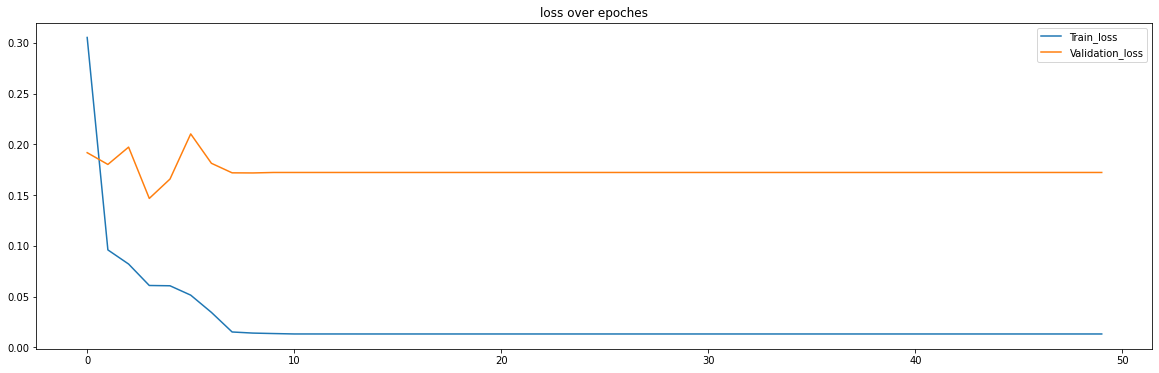

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,6))
ech = range(50)
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(
    ech,
    train_loss,
    label = 'Train_loss'
)
plt.plot(
    ech,
    test_loss,
    label = 'Validation_loss'
)
plt.legend()
plt.title('loss over epoches')

Text(0.5, 1.0, 'Accuracy over epoches')

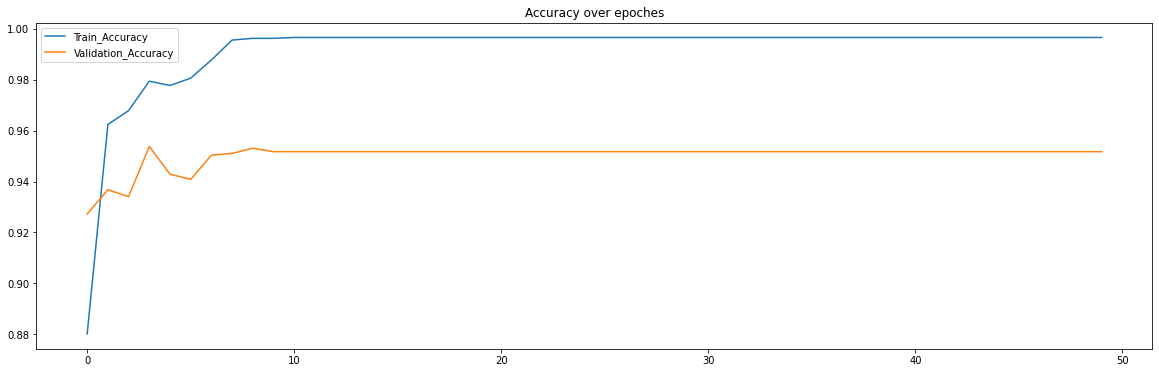

In [ ]:
plt.figure(figsize = (20,6))
ech = range(50)
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(
    ech,
    train_acc,
    label = 'Train_Accuracy'
)
plt.plot(
    ech,
    test_acc,
    label = 'Validation_Accuracy'
)
plt.legend()
plt.title('Accuracy over epoches')

# **Testing**

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/model_2.h5')

In [ ]:
test_df = pd.read_csv('/content/test.csv')

In [ ]:
test_df_y = test_df['Activity'] 

In [ ]:
test_df_x = test_df.drop('Activity',axis = 1)

In [ ]:
test_df_x

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24


In [ ]:
test_df_x = scaler.transform(test_df_x)

In [ ]:
test_df_x

In [ ]:
test_df_y = label.transform(test_df_y)

In [ ]:
model.evaluate(test_df_x,test_df_y)

93/93 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9393


[0.2076578140258789, 0.9392602443695068]